In [69]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


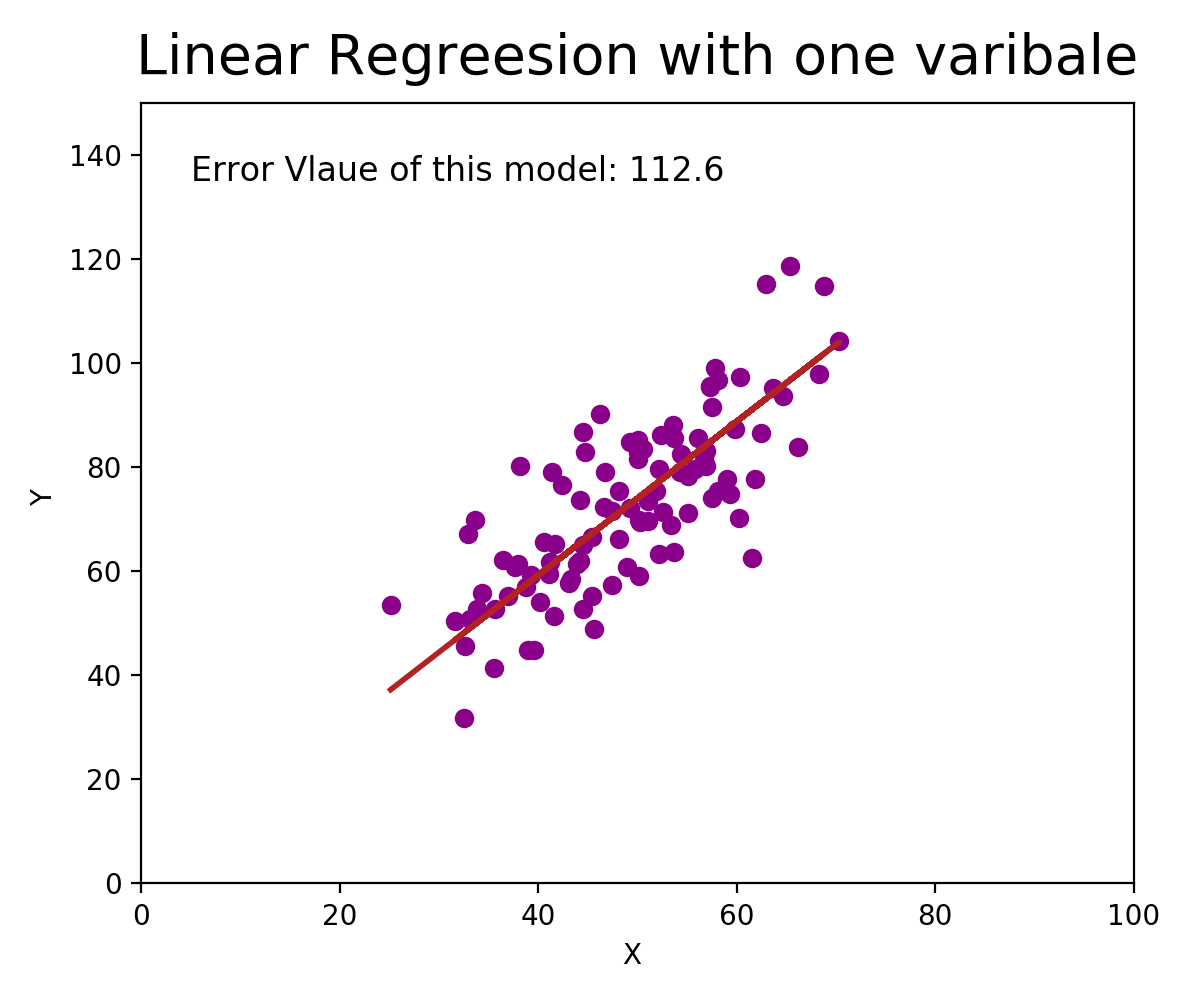

In [74]:
def GetData(filename):
    data = np.genfromtxt(filename, delimiter=",")
    dataX = data[:,0]
    dataY = data[:,1]
    return dataX,dataY  

def ErrorFunction(K,B,dataX,dataY):
    totalError = 0
    for i in range(len(dataX)):
        totalError += (1/len(dataX))*(dataY[i] - (K*dataX[i] + B))**2
    return totalError

def CalculateGradient(dataX,dataY,InitialK,InitialB,LearningRate):
    PartialK=0
    PartialB=0
    N=len(dataX)
    for i in range(len(dataX)):
        PartialK += (2/N)*(-dataX[i]*(dataY[i]-(InitialK*dataX[i]+InitialB)))
        PartialB += (2/N)*(-(dataY[i]-(InitialK*dataX[i]+InitialB)))
    CurrentK = InitialK - LearningRate*PartialK
    CurrentB = InitialB - LearningRate*PartialB
    return CurrentK,CurrentB

def GradientDesecentOperator(dataX,dataY,InitialK,InitialB,LearningRate,num_iterations):
    for i in range(num_iterations):
        InitialK,InitialB=CalculateGradient(dataX,dataY,InitialK,InitialB,LearningRate)
    return InitialK,InitialB

def Draw(dataX,dataY,K,B,Error):
    fig, ax = plt.subplots(1, 1,figsize=(6, 5), dpi=100)
    plt.scatter(dataX, dataY,c='darkmagenta',alpha=1)
    plt.plot(dataX,K*dataX+B, color="firebrick", linewidth=2.0)
    plt.text(5,135,'Error Vlaue of this model: {:.5}'.format(str(Error)),fontsize=12)
    ax.set_title("Linear Regreesion with one varibale", fontsize=20, verticalalignment='bottom')
    ax.set_xlabel("X ")
    ax.set_ylabel("Y ")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 150)
    fig.tight_layout()
    plt.show()
    
X,Y = GetData('traindata.txt')      
K,B = GradientDesecentOperator(X,Y,0,0,0.0001,1000)   
ErrorValue = ErrorFunction(K,B,X,Y)
Draw(X,Y,K,B,ErrorValue)
